In [1]:
import pandas as pd
import pandas_ta as ta

df = pd.DataFrame() # Empty DataFrame

# Load data
# df = pd.read_csv("sbin_ohlcva.csv", sep=",")
# OR if you have yfinance installed
df = df.ta.ticker("aapl")
print(df.tail())

# VWAP requires the DataFrame index to be a DatetimeIndex.
# Replace "datetime" with the appropriate column from your DataFrame
df.set_index(pd.DatetimeIndex(df["datetime"]), inplace=True)

# Calculate Returns and append to the df DataFrame
df.ta.log_return(cumulative=True, append=True)
df.ta.percent_return(cumulative=True, append=True)

# New Columns with results
df.columns

# Take a peek
df.tail()

# vv Continue Post Processing vv

                                 Open        High         Low       Close  \
Date                                                                        
2023-06-22 00:00:00-04:00  183.740005  187.050003  183.669998  187.000000   
2023-06-23 00:00:00-04:00  185.550003  187.559998  185.009995  186.679993   
2023-06-26 00:00:00-04:00  186.830002  188.050003  185.229996  185.270004   
2023-06-27 00:00:00-04:00  185.889999  188.389999  185.669998  188.059998   
2023-06-28 00:00:00-04:00  187.929993  189.899994  187.600006  189.250000   

                             Volume  Dividends  Stock Splits  
Date                                                          
2023-06-22 00:00:00-04:00  51245300        0.0           0.0  
2023-06-23 00:00:00-04:00  53079300        0.0           0.0  
2023-06-26 00:00:00-04:00  48088700        0.0           0.0  
2023-06-27 00:00:00-04:00  50730800        0.0           0.0  
2023-06-28 00:00:00-04:00  51133200        0.0           0.0  


KeyError: 'datetime'

# Standard

You explicitly define the input columns and take care of the output.

In [2]:
sma10 = ta.sma(df["Close"], length=10)

#     Returns a Series with name: SMA_10
print(sma10)


Date
1980-12-12 00:00:00-05:00           NaN
1980-12-15 00:00:00-05:00           NaN
1980-12-16 00:00:00-05:00           NaN
1980-12-17 00:00:00-05:00           NaN
1980-12-18 00:00:00-05:00           NaN
                                ...    
2023-06-22 00:00:00-04:00    183.948000
2023-06-23 00:00:00-04:00    184.558998
2023-06-26 00:00:00-04:00    184.989998
2023-06-27 00:00:00-04:00    185.416998
2023-06-28 00:00:00-04:00    186.010999
Name: SMA_10, Length: 10725, dtype: float64


In [3]:
donchiandf = ta.donchian(df["High"], df["Low"], lower_length=10, upper_length=15)
print(donchiandf)

                            DCL_10_15   DCM_10_15   DCU_10_15
Date                                                         
1980-12-12 00:00:00-05:00         NaN         NaN         NaN
1980-12-15 00:00:00-05:00         NaN         NaN         NaN
1980-12-16 00:00:00-05:00         NaN         NaN         NaN
1980-12-17 00:00:00-05:00         NaN         NaN         NaN
1980-12-18 00:00:00-05:00         NaN         NaN         NaN
...                               ...         ...         ...
2023-06-22 00:00:00-04:00  177.460007  182.255005  187.050003
2023-06-23 00:00:00-04:00  180.630005  184.095001  187.559998
2023-06-26 00:00:00-04:00  180.970001  184.510002  188.050003
2023-06-27 00:00:00-04:00  182.020004  185.205002  188.389999
2023-06-28 00:00:00-04:00  182.020004  185.959999  189.899994

[10725 rows x 3 columns]


In [4]:
ema10_ohlc4 = ta.ema(ta.ohlc4(df["Open"], df["High"], df["Low"], df["Close"]), length=10)
print(ema10_ohlc4)

Date
1980-12-12 00:00:00-05:00           NaN
1980-12-15 00:00:00-05:00           NaN
1980-12-16 00:00:00-05:00           NaN
1980-12-17 00:00:00-05:00           NaN
1980-12-18 00:00:00-05:00           NaN
                                ...    
2023-06-22 00:00:00-04:00    183.425339
2023-06-23 00:00:00-04:00    183.929823
2023-06-26 00:00:00-04:00    184.368946
2023-06-27 00:00:00-04:00    184.847774
2023-06-28 00:00:00-04:00    185.542724
Name: EMA_10, Length: 10725, dtype: float64


In [5]:
print(help)

Type help() for interactive help, or help(object) for help about object.


# Pandas TA DataFrame Extension

Calling df.ta will automatically lowercase OHLCVA to ohlcva: open, high, low, close, volume, adj_close. 
By default, df.ta will use the ohlcva for the indicator arguments removing the need to specify input columns directly.

In [6]:
sma10 = df.ta.sma(length=10)

# Returns a Series with name: SMA_10

# print(sma10)
sma10.tail()

Date
2023-06-22 00:00:00-04:00    183.948000
2023-06-23 00:00:00-04:00    184.558998
2023-06-26 00:00:00-04:00    184.989998
2023-06-27 00:00:00-04:00    185.416998
2023-06-28 00:00:00-04:00    186.010999
Name: SMA_10, dtype: float64

In [7]:
ema10_ohlc4 = df.ta.ema(close=df.ta.ohlc4(), length=10, suffix="OHLC4")

#     Returns a Series with name: EMA_10_OHLC4
#     Chaining Indicators require specifying the input like: close=df.ta.ohlc4().

ema10_ohlc4.tail()

Date
2023-06-22 00:00:00-04:00    183.425339
2023-06-23 00:00:00-04:00    183.929823
2023-06-26 00:00:00-04:00    184.368946
2023-06-27 00:00:00-04:00    184.847774
2023-06-28 00:00:00-04:00    185.542724
Name: EMA_10_OHLC4, dtype: float64

In [8]:
donchiandf = df.ta.donchian(lower_length=10, upper_length=15)

#     Returns a DataFrame named DC_10_15 and column names: DCL_10_15, DCM_10_15, DCU_10_15
donchiandf.tail()

,DCL_10_15,DCM_10_15,DCU_10_15
Date,,,
2023-06-22 00:00:00-04:00,177.460007,182.255005,187.050003
2023-06-23 00:00:00-04:00,180.630005,184.095001,187.559998
2023-06-26 00:00:00-04:00,180.970001,184.510002,188.050003
2023-06-27 00:00:00-04:00,182.020004,185.205002,188.389999
2023-06-28 00:00:00-04:00,182.020004,185.959999,189.899994


# Same as the last three examples, but appending the results directly to the DataFrame df.

In [9]:
df.ta.sma(length=10, append=True)

#     Appends to df column name: SMA_10.

print(donchiandf.tail())

                            DCL_10_15   DCM_10_15   DCU_10_15
Date                                                         
2023-06-22 00:00:00-04:00  177.460007  182.255005  187.050003
2023-06-23 00:00:00-04:00  180.630005  184.095001  187.559998
2023-06-26 00:00:00-04:00  180.970001  184.510002  188.050003
2023-06-27 00:00:00-04:00  182.020004  185.205002  188.389999
2023-06-28 00:00:00-04:00  182.020004  185.959999  189.899994


In [10]:
df.ta.ema(close=df.ta.ohlc4(append=True), length=10, suffix="OHLC4", append=True)

#     Chaining Indicators require specifying the input like: close=df.ta.ohlc4().
print(df.ta.ema)

<bound method AnalysisIndicators.ema of <pandas_ta.core.AnalysisIndicators object at 0x00000243A66B2C80>>


In [11]:
df.ta.donchian(lower_length=10, upper_length=15, append=True)

#     Appends to df with column names: DCL_10_15, DCM_10_15, DCU_10_15.
print(df.ta.donchian)

<bound method AnalysisIndicators.donchian of <pandas_ta.core.AnalysisIndicators object at 0x00000243A66B2C80>>


# Pandas TA Strategy

A Pandas TA Strategy is a named group of indicators to be run by the strategy method. 
All Strategies use mulitprocessing except when using the col_names parameter (see below). 
There are different types of Strategies listed in the following section.

In [12]:

# (1) Create the Strategy
MyStrategy = ta.Strategy(
    name="DCSMA10",
    ta=[
        {"kind": "ohlc4"},
        {"kind": "sma", "length": 10},
        {"kind": "donchian", "lower_length": 10, "upper_length": 15},
        {"kind": "ema", "close": "OHLC4", "length": 10, "suffix": "OHLC4"},
    ]
)

# (2) Run the Strategy
df.ta.strategy(MyStrategy, **kwargs)


NameError: name 'kwargs' is not defined

# Pandas TA Strategies

The Strategy Class is a simple way to name and group your favorite TA Indicators by using a Data Class. Pandas TA comes with two prebuilt basic Strategies to help you get started: AllStrategy and CommonStrategy. A Strategy can be as simple as the CommonStrategy or as complex as needed using Composition/Chaining.

    When using the strategy method, all indicators will be automatically appended to the DataFrame df.
    You are using a Chained Strategy when you have the output of one indicator as input into one or more indicators in the same Strategy.
    Note: Use the 'prefix' and/or 'suffix' keywords to distinguish the composed indicator from it's default Series.

See the Pandas TA Strategy Examples Notebook for examples including Indicator Composition/Chaining.

## Strategy Requirements

    name: Some short memorable string. Note: Case-insensitive "All" is reserved.
    ta: A list of dicts containing keyword arguments to identify the indicator and the indicator's arguments
    Note: A Strategy will fail when consumed by Pandas TA if there is no {"kind": "indicator name"} attribute. Remember to check your spelling.

## Optional Parameters

    description: A more detailed description of what the Strategy tries to capture. Default: None
    created: At datetime string of when it was created. Default: Automatically generated.


# Types of Strategies

## Builtin

In [42]:
# Running the Builtin CommonStrategy as mentioned above
df.ta.strategy(ta.CommonStrategy)

# The Default Strategy is the ta.AllStrategy. The following are equivalent:
df.ta.strategy()
df.ta.strategy("All")
df.ta.strategy(ta.AllStrategy)

131it [01:22,  1.59it/s]
131it [01:22,  1.59it/s]
131it [01:22,  1.59it/s]


## Categorical

In [43]:
# List of indicator categories
df.ta.categories

# Running a Categorical Strategy only requires the Category name
df.ta.strategy("Momentum") # Default values for all Momentum indicators
df.ta.strategy("overlap", length=42) # Override all Overlap 'length' attributes

39it [01:22,  2.11s/it]
32it [01:22,  2.57s/it]


## Custom

In [ ]:
# Create your own Custom Strategy
CustomStrategy = ta.Strategy(
    name="Momo and Volatility",
    description="SMA 50,200, BBANDS, RSI, MACD and Volume SMA 20",
    ta=[
        {"kind": "sma", "length": 50},
        {"kind": "sma", "length": 200},
        {"kind": "bbands", "length": 20},
        {"kind": "rsi"},
        {"kind": "macd", "fast": 8, "slow": 21},
        {"kind": "sma", "close": "volume", "length": 20, "prefix": "VOLUME"},
    ]
)
# To run your "Custom Strategy"
df.ta.strategy(CustomStrategy)

## Multiprocessing

The Pandas TA strategy method utilizes multiprocessing for bulk indicator processing of all Strategy types with ONE EXCEPTION! When using the col_names parameter to rename resultant column(s), the indicators in ta array will be ran in order.

In [ ]:
# VWAP requires the DataFrame index to be a DatetimeIndex.
# * Replace "datetime" with the appropriate column from your DataFrame
df.set_index(pd.DatetimeIndex(df["datetime"]), inplace=True)

# Runs and appends all indicators to the current DataFrame by default
# The resultant DataFrame will be large.
df.ta.strategy()
# Or the string "all"
df.ta.strategy("all")
# Or the ta.AllStrategy
df.ta.strategy(ta.AllStrategy)

# Use verbose if you want to make sure it is running.
df.ta.strategy(verbose=True)

# Use timed if you want to see how long it takes to run.
df.ta.strategy(timed=True)

# Choose the number of cores to use. Default is all available cores.
# For no multiprocessing, set this value to 0.
df.ta.cores = 4

# Maybe you do not want certain indicators.
# Just exclude (a list of) them.
df.ta.strategy(exclude=["bop", "mom", "percent_return", "wcp", "pvi"], verbose=True)

# Perhaps you want to use different values for indicators.
# This will run ALL indicators that have fast or slow as parameters.
# Check your results and exclude as necessary.
df.ta.strategy(fast=10, slow=50, verbose=True)

# Sanity check. Make sure all the columns are there
df.columns

## Custom Strategy without Multiprocessing

Remember These will not be utilizing multiprocessing

In [4]:
NonMPStrategy = ta.Strategy(
    name="EMAs, BBs, and MACD",
    description="Non Multiprocessing Strategy by rename Columns",
    ta=[
        {"kind": "ema", "length": 8},
        {"kind": "ema", "length": 21},
        {"kind": "bbands", "length": 20, "col_names": ("BBL", "BBM", "BBU")},
        {"kind": "macd", "fast": 8, "slow": 21, "col_names": ("MACD", "MACD_H", "MACD_S")}
    ]
)
# Run it
df.ta.strategy(NonMPStrategy)

Not enough col_names were specified : got 3, expected 5.


# DataFrame Properties

## adjusted

In [5]:
# Set ta to default to an adjusted column, 'adj_close', overriding default 'close'.
df.ta.adjusted = "adj_close"
df.ta.sma(length=10, append=True)

# To reset back to 'close', set adjusted back to None.
df.ta.adjusted = None

## categories

In [6]:
# List of Pandas TA categories.
df.ta.categories

['candles',
 'cycles',
 'momentum',
 'overlap',
 'performance',
 'statistics',
 'trend',
 'volatility',
 'volume']

## cores

In [7]:
# Set the number of cores to use for strategy multiprocessing
# Defaults to the number of cpus you have.
df.ta.cores = 4

# Set the number of cores to 0 for no multiprocessing.
df.ta.cores = 0

# Returns the number of cores you set or your default number of cpus.
df.ta.cores

0

## datetime_ordered

In [8]:
# The 'datetime_ordered' property returns True if the DataFrame
# index is of Pandas datetime64 and df.index[0] < df.index[-1].
# Otherwise it returns False.
df.ta.datetime_ordered

True

## exchange

In [11]:
# Sets the Exchange to use when calculating the last_run property. Default: "NYSE"
df.ta.exchange

# Set the Exchange to use.
# Available Exchanges: "ASX", "BMF", "DIFX", "FWB", "HKE", "JSE", "LSE", "NSE", "NYSE", "NZSX", "RTS", "SGX", "SSE", "TSE", "TSX"
df.ta.exchange = "LSE"

## last_run

In [13]:
# Returns the time Pandas TA was last run as a string.
df.ta.last_run

'Friday June 9, 2023, NYSE: 11:28:32, Local: 15:28:32 India Standard Time, Day 160/365 (44.00%)'

## reverse

In [14]:
# The 'reverse' is a helper property that returns the DataFrame
# in reverse order.
df.ta.reverse

,datetime,Open,High,Low,Close,Volume,adj_close,CUMLOGRET_1,CUMPCTRET_1,DCL_10_15,DCM_10_15,DCU_10_15,EMA_8,EMA_21,MACD,MACD_H,MACD_S,SMA_10
datetime,,,,,,,,,,,,,,,,,,
2022-10-19 00:00:00+05:30,2022-10-19 00:00:00+05:30,563.00,563.05,555.55,556.70,3071312,545.5660,0.572634,0.772930,520.20,541.850,563.5,543.048577,539.968297,3.080281,5.071380,-1.991099,537.090
2022-10-18 00:00:00+05:30,2022-10-18 00:00:00+05:30,547.10,563.50,546.75,562.45,20440781,551.2010,0.582909,0.791242,520.20,541.850,563.5,539.148171,538.295126,0.853045,4.111989,-3.258944,534.690
2022-10-17 00:00:00+05:30,2022-10-17 00:00:00+05:30,526.40,544.70,524.20,543.65,13485349,532.7770,0.548913,0.731369,518.50,534.700,550.9,532.490505,535.879639,-3.389134,0.897808,-4.286941,530.420
2022-10-14 00:00:00+05:30,2022-10-14 00:00:00+05:30,530.20,534.85,526.00,527.20,8545479,516.6560,0.518187,0.678981,516.15,542.075,568.0,529.302078,535.102603,-5.800524,-1.289131,-4.511393,529.115
2022-10-13 00:00:00+05:30,2022-10-13 00:00:00+05:30,533.00,533.80,520.20,521.45,12972765,511.0210,0.507220,0.660669,516.15,545.075,574.0,529.902672,535.892863,-5.990191,-1.801081,-4.189110,528.570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01-07 00:00:00+05:30,2015-01-07 00:00:00+05:30,300.00,302.55,295.14,300.14,15046745,294.1372,-0.045144,-0.044140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06 00:00:00+05:30,2015-01-06 00:00:00+05:30,310.00,311.10,298.70,299.89,15329257,293.8922,-0.045977,-0.044936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05 00:00:00+05:30,2015-01-05 00:00:00+05:30,316.25,316.80,312.10,312.75,9136716,306.4950,-0.003989,-0.003981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## prefix & suffix

In [15]:
# Applying a prefix to the name of an indicator.
prehl2 = df.ta.hl2(prefix="pre")
print(prehl2.name)  # "pre_HL2"

# Applying a suffix to the name of an indicator.
endhl2 = df.ta.hl2(suffix="post")
print(endhl2.name)  # "HL2_post"

# Applying a prefix and suffix to the name of an indicator.
bothhl2 = df.ta.hl2(prefix="pre", suffix="post")
print(bothhl2.name)  # "pre_HL2_post"

pre_HL2
HL2_post
pre_HL2_post


## time_range

In [16]:
# Returns the time range of the DataFrame as a float.
# By default, it returns the time in "years"
df.ta.time_range

# Available time_ranges include: "years", "months", "weeks", "days", "hours", "minutes". "seconds"
df.ta.time_range = "days"
df.ta.time_range # prints DataFrame time in "days" as float

2848

## to_utc

In [17]:
# Sets the DataFrame index to UTC format.
df.ta.to_utc

# DataFrame Methods

## constants

In [19]:
import numpy as np

# Add constant '1' to the DataFrame
df.ta.constants(True, [1])
# Remove constant '1' to the DataFrame
df.ta.constants(False, [1])

# Adding constants for charting
import numpy as np
chart_lines = np.append(np.arange(-4, 5, 1), np.arange(-100, 110, 10))
df.ta.constants(True, chart_lines)
# Removing some constants from the DataFrame
df.ta.constants(False, np.array([-60, -40, 40, 60]))

## indicators

In [20]:
# Prints the indicators and utility functions
df.ta.indicators()

# Returns a list of indicators and utility functions
ind_list = df.ta.indicators(as_list=True)

# Prints the indicators and utility functions that are not in the excluded list
df.ta.indicators(exclude=["cg", "pgo", "ui"])
# Returns a list of the indicators and utility functions that are not in the excluded list
smaller_list = df.ta.indicators(exclude=["cg", "pgo", "ui"], as_list=True)

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

## ticker

In [21]:
# Download Chart history using yfinance. (pip install yfinance) https://github.com/ranaroussi/yfinance
# It uses the same keyword arguments as yfinance (excluding start and end)
df = df.ta.ticker("aapl") # Default ticker is "SPY"

# Period is used instead of start/end
# Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
# Default: "max"
df = df.ta.ticker("aapl", period="1y") # Gets this past year

# History by Interval by interval (including intraday if period < 60 days)
# Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
# Default: "1d"
df = df.ta.ticker("aapl", period="1y", interval="1wk") # Gets this past year in weeks
df = df.ta.ticker("aapl", period="1mo", interval="1h") # Gets this past month in hours

# BUT WAIT!! THERE'S MORE!!
help(ta.yf)

Help on function yf in module pandas_ta.utils.data.yahoofinance:

yf(ticker: str, **kwargs)
    yf - yfinance wrapper
    
    It retrieves market data (ohlcv) from Yahoo Finance using yfinance.
    To install yfinance. (pip install yfinance) This method can also pull
    additional data using the 'kind' kwarg. By default kind=None and retrieves
    Historical Chart Data.
    
    Other options of 'kind' include:
    * All: "all"
        - Prints everything below but only returns Chart History to Pandas TA
    * Company Information: "info"
    * Institutional Holders: "institutional_holders" or "ih"
    * Major Holders: "major_holders" or "mh"
    * Mutual Fund Holders: "mutualfund_holders" or "mfh"
    * Recommendations (YTD): "recommendations" or "rec"
    * Earnings Calendar: "calendar" or "cal"
    * Earnings: "earnings" or "earn"
    * Sustainability/ESG Scores: "sustainability", "sus" or "esg"
    * Financials: "financials" or "fin"
        - Returns in order: Income Statement, B

# Indicators (by Category)

## Candles (64)

Patterns that are not bold, require TA-Lib to be installed: pip install TA-Lib

    2crows
    3blackcrows
    3inside
    3linestrike
    3outside
    3starsinsouth
    3whitesoldiers
    abandonedbaby
    advanceblock
    belthold
    breakaway
    closingmarubozu
    concealbabyswall
    counterattack
    darkcloudcover
    doji
    dojistar
    dragonflydoji
    engulfing
    eveningdojistar
    eveningstar
    gapsidesidewhite
    gravestonedoji
    hammer
    hangingman
    harami
    haramicross
    highwave
    hikkake
    hikkakemod
    homingpigeon
    identical3crows
    inneck
    inside
    invertedhammer
    kicking
    kickingbylength
    ladderbottom
    longleggeddoji
    longline
    marubozu
    matchinglow
    mathold
    morningdojistar
    morningstar
    onneck
    piercing
    rickshawman
    risefall3methods
    separatinglines
    shootingstar
    shortline
    spinningtop
    stalledpattern
    sticksandwich
    takuri
    tasukigap
    thrusting
    tristar
    unique3river
    upsidegap2crows
    xsidegap3methods
    Heikin-Ashi: ha
    Z Score: cdl_z


## Cycles (1)

    Even Better Sinewave: ebsw


## Momentum (41)

    Awesome Oscillator: ao
    Absolute Price Oscillator: apo
    Bias: bias
    Balance of Power: bop
    BRAR: brar
    Commodity Channel Index: cci
    Chande Forecast Oscillator: cfo
    Center of Gravity: cg
    Chande Momentum Oscillator: cmo
    Coppock Curve: coppock
    Correlation Trend Indicator: cti
        A wrapper for ta.linreg(series, r=True)
    Directional Movement: dm
    Efficiency Ratio: er
    Elder Ray Index: eri
    Fisher Transform: fisher
    Inertia: inertia
    KDJ: kdj
    KST Oscillator: kst
    Moving Average Convergence Divergence: macd
    Momentum: mom
    Pretty Good Oscillator: pgo
    Percentage Price Oscillator: ppo
    Psychological Line: psl
    Percentage Volume Oscillator: pvo
    Quantitative Qualitative Estimation: qqe
    Rate of Change: roc
    Relative Strength Index: rsi
    Relative Strength Xtra: rsx
    Relative Vigor Index: rvgi
    Schaff Trend Cycle: stc
    Slope: slope
    SMI Ergodic smi
    Squeeze: squeeze
        Default is John Carter's. Enable Lazybear's with lazybear=True
    Squeeze Pro: squeeze_pro
    Stochastic Oscillator: stoch
    Stochastic RSI: stochrsi
    TD Sequential: td_seq
        Excluded from df.ta.strategy().
    Trix: trix
    True strength index: tsi
    Ultimate Oscillator: uo
    Williams %R: willr

Moving Average Convergence Divergence (MACD)
Example MACD



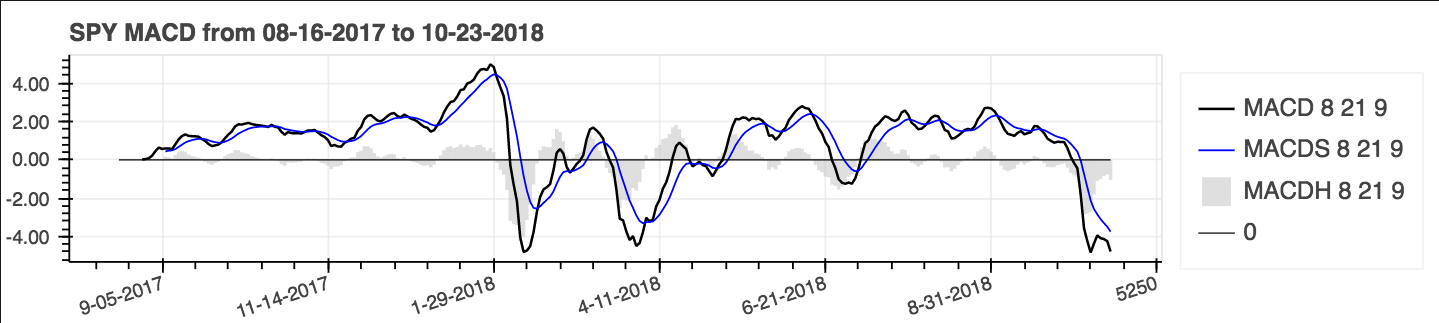

## Overlap (33)

    Arnaud Legoux Moving Average: alma
    Double Exponential Moving Average: dema
    Exponential Moving Average: ema
    Fibonacci's Weighted Moving Average: fwma
    Gann High-Low Activator: hilo
    High-Low Average: hl2
    High-Low-Close Average: hlc3
        Commonly known as 'Typical Price' in Technical Analysis literature
    Hull Exponential Moving Average: hma
    Holt-Winter Moving Average: hwma
    Ichimoku Kinkō Hyō: ichimoku
        Returns two DataFrames. For more information: help(ta.ichimoku).
        lookahead=False drops the Chikou Span Column to prevent potential data leak.
    Jurik Moving Average: jma
    Kaufman's Adaptive Moving Average: kama
    Linear Regression: linreg
    McGinley Dynamic: mcgd
    Midpoint: midpoint
    Midprice: midprice
    Open-High-Low-Close Average: ohlc4
    Pascal's Weighted Moving Average: pwma
    WildeR's Moving Average: rma
    Sine Weighted Moving Average: sinwma
    Simple Moving Average: sma
    Ehler's Super Smoother Filter: ssf
    Supertrend: supertrend
    Symmetric Weighted Moving Average: swma
    T3 Moving Average: t3
    Triple Exponential Moving Average: tema
    Triangular Moving Average: trima
    Variable Index Dynamic Average: vidya
    Volume Weighted Average Price: vwap
        Requires the DataFrame index to be a DatetimeIndex
    Volume Weighted Moving Average: vwma
    Weighted Closing Price: wcp
    Weighted Moving Average: wma
    Zero Lag Moving Average: zlma
    
    ![image.png](attachment:image.png)


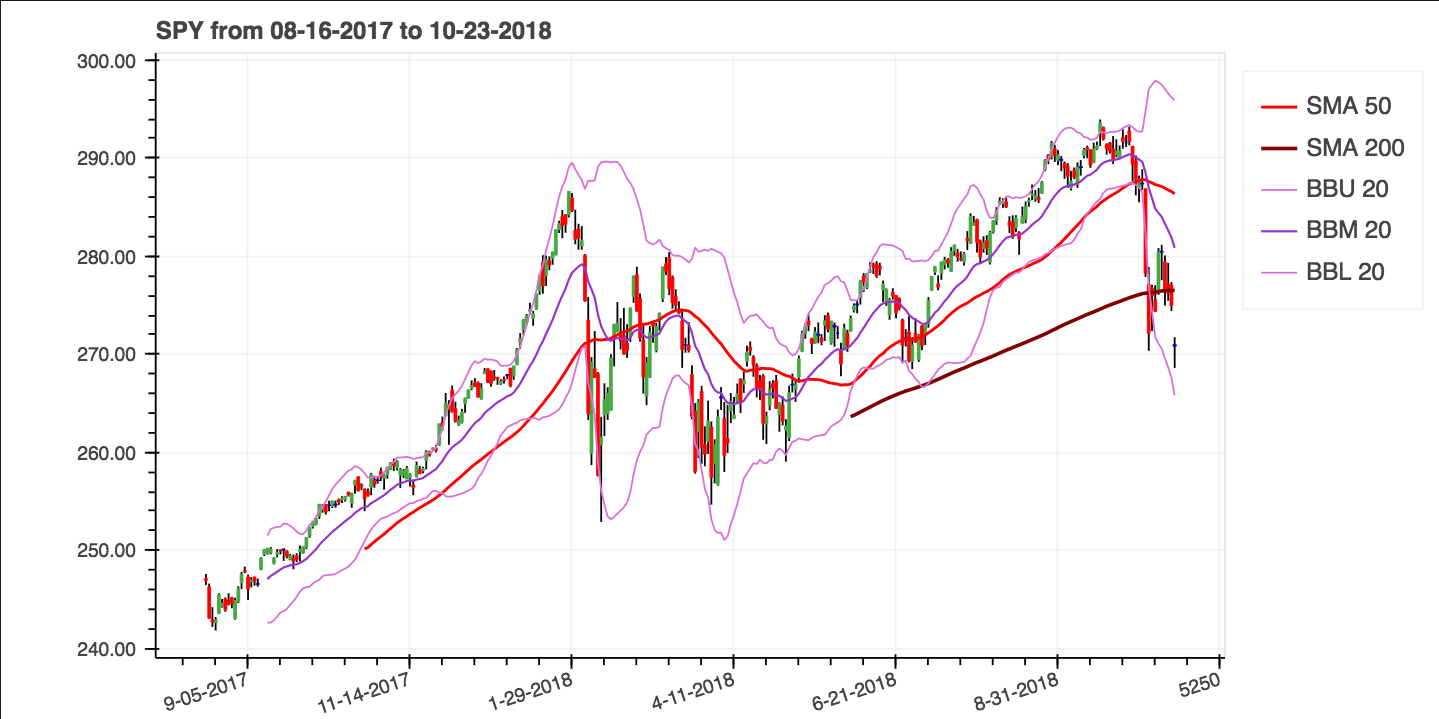

## Performance (3)

Use parameter: cumulative=True for cumulative results.

    Draw Down: drawdown
    Log Return: log_return
    Percent Return: percent_return

### Percent Return (Cumulative) with Simple Moving Average (SMA)

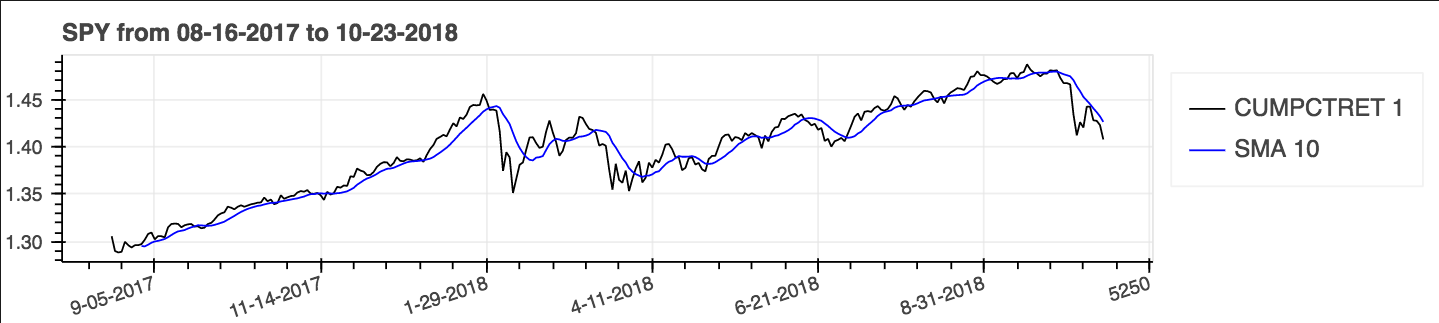

## Statistics (11)

    Entropy: entropy
    Kurtosis: kurtosis
    Mean Absolute Deviation: mad
    Median: median
    Quantile: quantile
    Skew: skew
    Standard Deviation: stdev
    Think or Swim Standard Deviation All: tos_stdevall
    Variance: variance
    Z Score: zscore
    
### Z Score


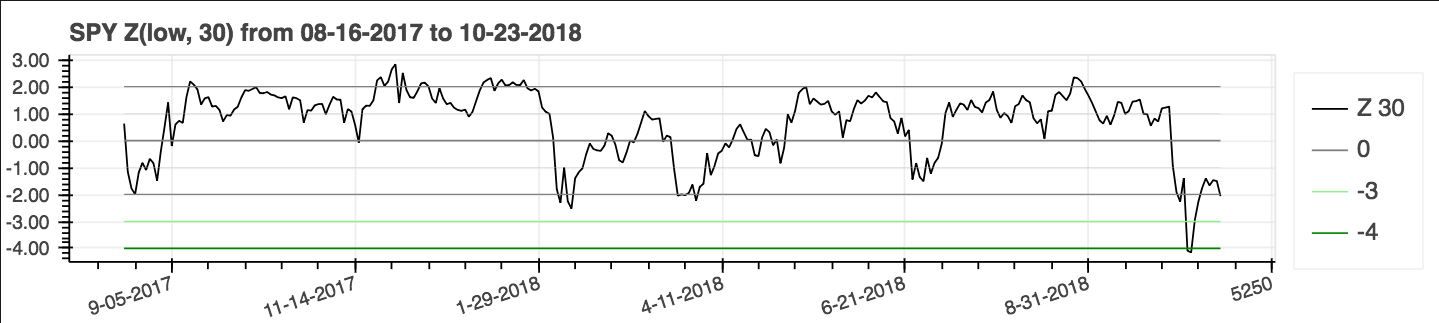

## Trend (18)

    Average Directional Movement Index: adx
        Also includes dmp and dmn in the resultant DataFrame.
    Archer Moving Averages Trends: amat
    Aroon & Aroon Oscillator: aroon
    Choppiness Index: chop
    Chande Kroll Stop: cksp
    Decay: decay
        Formally: linear_decay
    Decreasing: decreasing
    Detrended Price Oscillator: dpo
        Set lookahead=False to disable centering and remove potential data leak.
    Increasing: increasing
    Long Run: long_run
    Parabolic Stop and Reverse: psar
    Q Stick: qstick
    Short Run: short_run
    Trend Signals: tsignals
    TTM Trend: ttm_trend
    Vertical Horizontal Filter: vhf
    Vortex: vortex
    Cross Signals: xsignals

### Average Directional Movement Index (ADX)
Example ADX

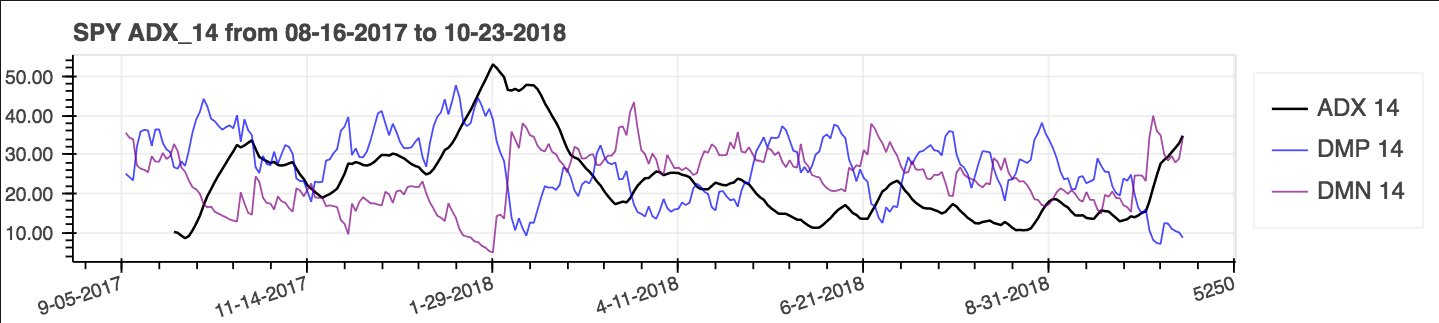

## Utility (5)

    Above: above
    Above Value: above_value
    Below: below
    Below Value: below_value
    Cross: cross


## Volatility (14)

    Aberration: aberration
    Acceleration Bands: accbands
    Average True Range: atr
    Bollinger Bands: bbands
    Donchian Channel: donchian
    Holt-Winter Channel: hwc
    Keltner Channel: kc
    Mass Index: massi
    Normalized Average True Range: natr
    Price Distance: pdist
    Relative Volatility Index: rvi
    Elder's Thermometer: thermo
    True Range: true_range
    Ulcer Index: ui

### Average True Range (ATR)
Example ATR

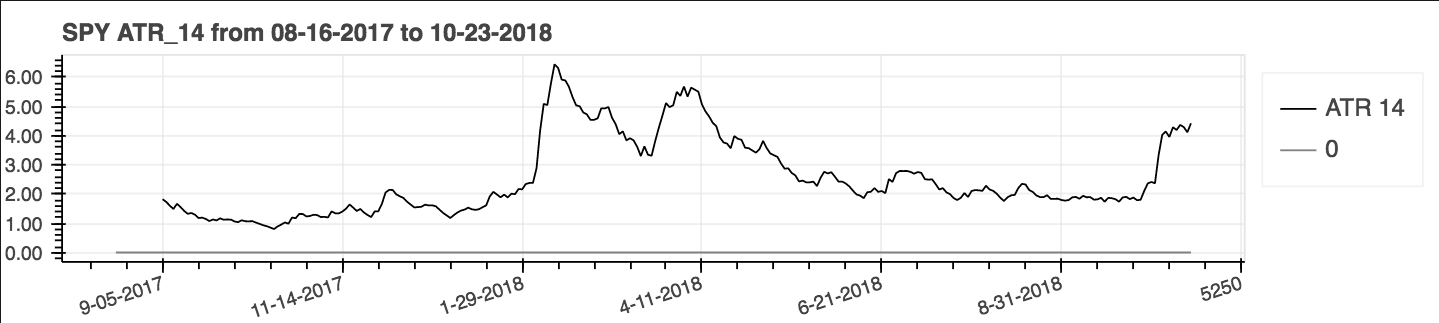

## Volume (15)

    Accumulation/Distribution Index: ad
    Accumulation/Distribution Oscillator: adosc
    Archer On-Balance Volume: aobv
    Chaikin Money Flow: cmf
    Elder's Force Index: efi
    Ease of Movement: eom
    Klinger Volume Oscillator: kvo
    Money Flow Index: mfi
    Negative Volume Index: nvi
    On-Balance Volume: obv
    Positive Volume Index: pvi
    Price-Volume: pvol
    Price Volume Rank: pvr
    Price Volume Trend: pvt
    Volume Profile: vp

### On-Balance Volume (OBV)

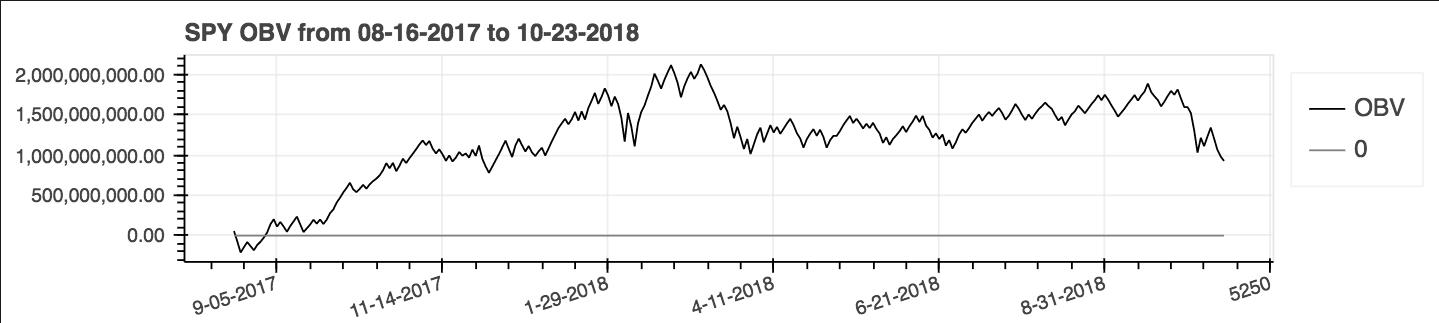

# Performance Metrics   BETA

Performance Metrics are a new addition to the package and consequentially are likely unreliable. 
Use at your own risk. These metrics return a float and are not part of the DataFrame Extension. 
They are called the Standard way. For Example:

In [24]:
import pandas_ta as ta
result = ta.cagr(df.Close)

## Available Metrics

    Compounded Annual Growth Rate: cagr
    Calmar Ratio: calmar_ratio
    Downside Deviation: downside_deviation
    Jensen's Alpha: jensens_alpha
    Log Max Drawdown: log_max_drawdown
    Max Drawdown: max_drawdown
    Pure Profit Score: pure_profit_score
    Sharpe Ratio: sharpe_ratio
    Sortino Ratio: sortino_ratio
    Volatility: volatility


## Backtesting with vectorbt

For easier integration with vectorbt's Portfolio from_signals method, the ta.trend_return method has been replaced with ta.tsignals method to simplify the generation of trading signals. For a comprehensive example, see the example Jupyter Notebook VectorBT Backtest with Pandas TA in the examples directory.

### Brief example

    See the vectorbt website more options and examples.


In [26]:
import pandas as pd
import pandas_ta as ta
import vectorbt as vbt

df = pd.DataFrame().ta.ticker("AAPL") # requires 'yfinance' installed

# Create the "Golden Cross" 
df["GC"] = df.ta.sma(50, append=True) > df.ta.sma(200, append=True)

# Create boolean Signals(TS_Entries, TS_Exits) for vectorbt
golden = df.ta.tsignals(df.GC, asbool=True, append=True)

# Sanity Check (Ensure data exists)
print(df)

# Create the Signals Portfolio
pf = vbt.Portfolio.from_signals(df.Close, entries=golden.TS_Entries, exits=golden.TS_Exits, freq="D", init_cash=100_000, fees=0.0025, slippage=0.0025)

# Print Portfolio Stats and Return Stats
print(pf.stats())
print(pf.returns_stats())

                                 Open        High         Low       Close  \
Date                                                                        
1980-12-12 00:00:00-05:00    0.099584    0.100017    0.099584    0.099584   
1980-12-15 00:00:00-05:00    0.094821    0.094821    0.094388    0.094388   
1980-12-16 00:00:00-05:00    0.087894    0.087894    0.087461    0.087461   
1980-12-17 00:00:00-05:00    0.089625    0.090058    0.089625    0.089625   
1980-12-18 00:00:00-05:00    0.092224    0.092657    0.092224    0.092224   
...                               ...         ...         ...         ...   
2023-06-02 00:00:00-04:00  181.029999  181.779999  179.259995  180.949997   
2023-06-05 00:00:00-04:00  182.630005  184.949997  178.039993  179.580002   
2023-06-06 00:00:00-04:00  179.970001  180.119995  177.429993  179.210007   
2023-06-07 00:00:00-04:00  178.440002  181.210007  177.320007  177.820007   
2023-06-08 00:00:00-04:00  177.899994  180.839996  177.460007  180.570007   

# Changes

## General

    A Strategy Class to help name and group your favorite indicators.
    If a TA Lib is already installed, Pandas TA will run TA Lib's version. (BETA)
    Some indicators have had their mamode kwarg updated with more moving average choices with the Moving Average Utility function ta.ma(). For simplicity, all choices are single source moving averages. This is primarily an internal utility used by indicators that have a mamode kwarg. This includes indicators: accbands, amat, aobv, atr, bbands, bias, efi, hilo, kc, natr, qqe, rvi, and thermo; the default mamode parameters have not changed. However, ta.ma() can be used by the user as well if needed. For more information: help(ta.ma)
        Moving Average Choices: dema, ema, fwma, hma, linreg, midpoint, pwma, rma, sinwma, sma, swma, t3, tema, trima, vidya, wma, zlma.
    An experimental and independent Watchlist Class located in the Examples Directory that can be used in conjunction with the new Strategy Class.
    Linear Regression (linear_regression) is a new utility method for Simple Linear Regression using Numpy or Scikit Learn's implementation.
    Added utility/convience function, to_utc, to convert the DataFrame index to UTC. See: help(ta.to_utc) Now as a Pandas TA DataFrame Property to easily convert the DataFrame index to UTC.

